In [211]:
# Load libraries for this and next parts of the cases at once
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [212]:
# dataset downloading, selecting and reordering columns for further analysis
dataset=pd.read_excel("cata.xlsx")
dataset=dataset.drop(['name','sibsp', 'parch', 'ticket', 'fare', 
                      'cabin', 'embarked', 'boat', 'body', 'home.dest'],axis=1)
dataset=dataset[['survived','pclass', 'sex', 'age']]

In [213]:
# exploratory data analysis and cleaning
dataset.head()

,survived,pclass,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,0,1,female,2.0000
3,0,1,male,30.0000
4,0,1,female,25.0000


In [214]:
dataset.shape

(1309, 4)

In [215]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 41.0+ KB


In [216]:
dataset.describe()

,survived,pclass,age
count,1309.000000,1309.000000,1046.000000
mean,0.381971,2.294882,29.881135
std,0.486055,0.837836,14.413500
min,0.000000,1.000000,0.166700
25%,0.000000,2.000000,21.000000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,39.000000
max,1.000000,3.000000,80.000000


In [217]:
# checking the dataset for nan and deleting empty rows
dataset.isna().sum()

survived      0
pclass        0
sex           0
age         263
dtype: int64

In [218]:
dataset=dataset.dropna(axis=0)

In [219]:
# formatting the "survived" column into categorical
dataset.survived.replace(to_replace=[0,1],value=["no","yes"], inplace=True)
dataset.sex.replace(to_replace=["female","male"],value=[0,1], inplace=True)

In [220]:
dataset = dataset.astype({'survived':'category','pclass':'int','sex':'int','age':'float'})

In [221]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  1046 non-null   category
 1   pclass    1046 non-null   int32   
 2   sex       1046 non-null   int32   
 3   age       1046 non-null   float64 
dtypes: category(1), float64(1), int32(2)
memory usage: 25.7 KB


In [222]:
# EDA (exploratory data analysis) - scatter plot matrix
# scatter_matrix(dataset)
# pyplot.show()

In [258]:
# split-out validation dataset
array = dataset.values
X = array[:,1:]
y = array[:,0]

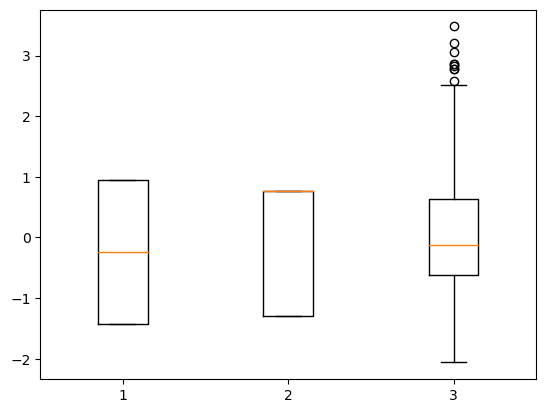

In [247]:
# # standardize the data (the age scale is times higher vs the others)
object=StandardScaler()
X=object.fit_transform(X)
plt.boxplot(X)
plt.show()

In [252]:
# changing datatype of y to numerical (specifically for building the LR model in this part of the cases)
yn=y.copy()
yn[yn=='yes']=1
yn[yn=='no']=0
yn=yn.astype(int)

In [253]:
# set up the train & test split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, yn, test_size=0.20, random_state=1)

In [254]:
# Linear Regression model and cross-validation deployment
modelLR=LinearRegression()
scores=cross_val_score(modelLR, X_train, Y_train, cv=5, scoring='r2')
print(' R2 scores mean - %.2f: std - %.2f' % (scores.mean(), scores.std()))

 R2 scores mean - 0.32: std - 0.09


In [255]:
# fitting the model and making predictions for the validation (test) dataset
# the achieved R2 correlation is medium, the linear model is not efficient.
# modelLR=LinearRegression()
modelLR.fit(X_train, Y_train)
predictions = modelLR.predict(X_validation)
predictions=np.round(predictions.astype(float),0)
print("______________________________________________")
print("R2 coefficient")
print('%.2f' % np.corrcoef(predictions,Y_validation)[0,1])

______________________________________________
R2 coefficient
0.58


In [264]:
# the sex has the highest impact on survival among the others
importance=modelLR.coef_
print("pclass, sex, age: ", np.round(importance,2))

pclass, sex, age:  [-0.14 -0.24 -0.08]


In [232]:
# in the next part I will deploy multiple set of linear and non-linear models to find the best one